In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

# Loading Data

In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml(data_id=40499)
data

{'data':          V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
 0    -1.223 -0.798 -0.867 -0.639 -0.545 -0.412 -0.795 -0.629 -0.547 -0.868   
 1    -1.410 -1.029 -1.013 -0.895 -0.762 -0.676 -1.043 -0.851 -0.775 -1.037   
 2    -1.107 -0.649 -0.629 -0.492 -0.367 -0.298 -0.682 -0.478 -0.395 -0.681   
 3    -1.270 -0.855 -0.958 -0.707 -0.619 -0.469 -0.872 -0.705 -0.620 -0.988   
 4    -1.331 -0.862 -0.761 -0.689 -0.498 -0.361 -0.857 -0.600 -0.496 -0.779   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 5495 -0.775 -0.355 -0.556 -0.172 -0.212 -0.148 -0.419 -0.343 -0.218 -0.623   
 5496 -1.166 -0.509 -0.354 -0.250 -0.047 -0.073 -0.515 -0.247 -0.177 -0.457   
 5497 -1.203 -0.452 -0.118 -0.243 -0.141 -0.074 -0.457 -0.183 -0.150 -0.218   
 5498 -1.107 -0.385 -0.550 -0.236 -0.174 -0.157 -0.538 -0.392 -0.261 -0.785   
 5499 -0.804 -0.231 -0.515  0.000 -0.039  0.022 -0.280 -0.255 -0.117 -0.608   
 
       ...    V31    V32    V33    V34    

In [3]:
df = pd.DataFrame(data=data.data)
df['target'] = data.target

for col in df.columns[:-1]:
    df[col] = df[col].astype(np.float64)

df['target'] = df['target'].astype(np.int8)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,target
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,5
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,5
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,5
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,5
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,5


# Balanced Distribution of Data

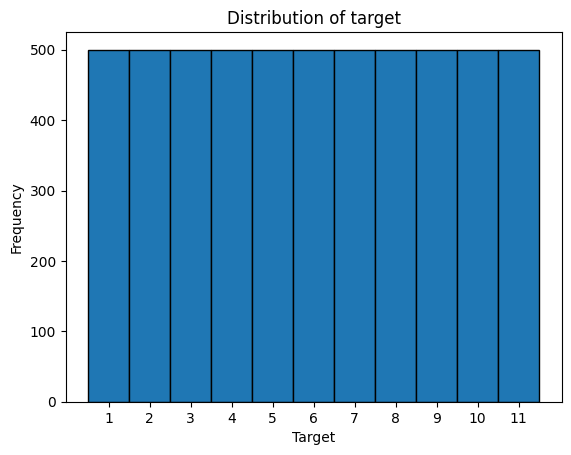

In [4]:
bins = np.arange(0.5, 11.5 + 1)

plt.hist(df['target'], bins=bins, edgecolor='black')

plt.xticks(np.arange(1, 12))

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of target')
plt.show()

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]].to_numpy(), df[df.columns[-1]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Distribution of data in training set and testing set

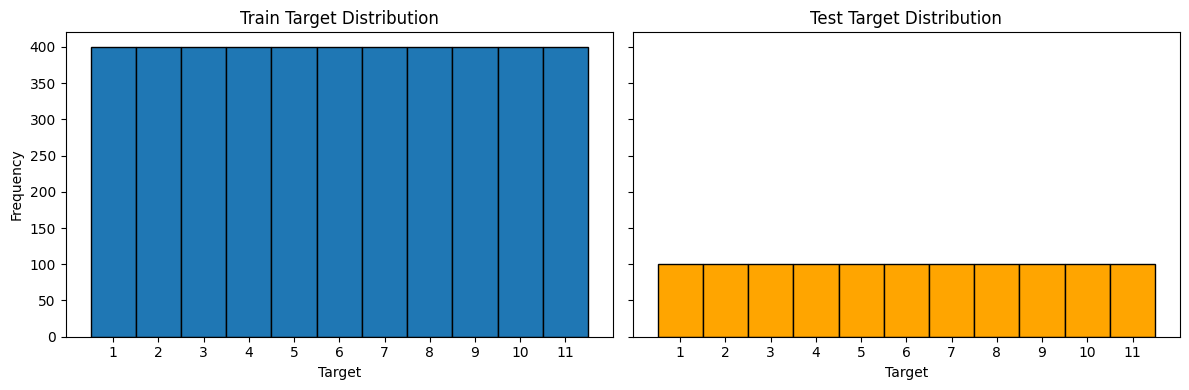

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Train
axes[0].hist(y_train, bins=bins, edgecolor='black')
axes[0].set_xticks(np.arange(1, 12))
axes[0].set_title("Train Target Distribution")
axes[0].set_xlabel("Target")
axes[0].set_ylabel("Frequency")

# Test
axes[1].hist(y_test, bins=bins, edgecolor='black', color='orange')
axes[1].set_xticks(np.arange(1, 12))
axes[1].set_title("Test Target Distribution")
axes[1].set_xlabel("Target")

plt.tight_layout()
plt.show()

# Feature Scaling: Not Required for Naive Bayes
As We are calculating seperately the probability distribution for each feature
So individual distribution doesnt impact each other

# Gaussian Naive Bayes Classifier Implementation

In [7]:
class GaussianNaiveBayesClassifier:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}

    def train(self, X, y):
        self.classes = np.unique(y)
        self.n_features = X.shape[1]
        self.priors = self._calculate_prior_proba(y)
        self.likelihoods = self._calculate_likelihoods(X, y)
    
    def _calculate_prior_proba(self, y):
        classes, cnt_per_class = np.unique(y, return_counts=True)
        total_cnt = len(y)
        return dict(zip(classes, cnt_per_class / total_cnt))
    
    def _calculate_likelihoods(self, X, y):
        likelihoods = {}
        for class_ in self.classes:
            X_class_ = X[y == class_]
            likelihoods[class_] = {
                "mean": np.mean(X_class_, axis=0),
                "var": np.var(X_class_, axis=0) + 1e-9
            }
        return likelihoods

    def _gaussian_pdf(self, x, mean, var):
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var)
        exponent = np.exp(- (x - mean) ** 2 / (2 * var))
        return coeff * exponent

    def _predict_single(self, X_test_row):
        class_scores = {}
        for class_ in self.classes:
            prior_log = np.log(self.priors[class_])
            mean = self.likelihoods[class_]["mean"]
            var = self.likelihoods[class_]["var"]

            likelihood_log = np.sum(np.log(self._gaussian_pdf(X_test_row, mean, var)))
            class_scores[class_] = prior_log + likelihood_log

        return max(class_scores, key=class_scores.get)
    
    def predict(self, X_test):
        return np.array([self._predict_single(row) for row in X_test])

# Evaluation

In [8]:
impl_model = GaussianNaiveBayesClassifier()
impl_model.train(X_train, y_train)
impl_y_pred = impl_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

impl_accuracy = accuracy_score(y_true=y_test, y_pred=impl_y_pred)
print(f'model accuracy {impl_accuracy}')

model accuracy 0.7536363636363637


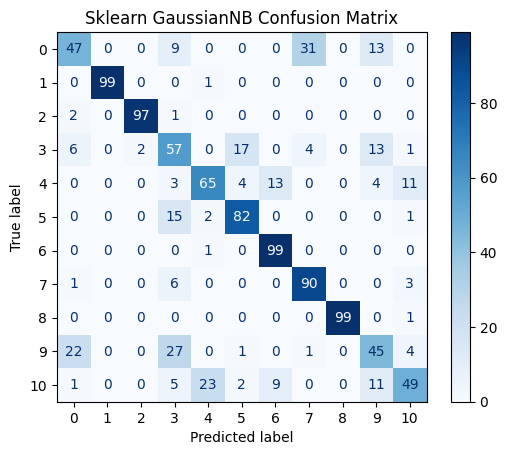

In [10]:
impl_cnf_mat = confusion_matrix(y_true=y_test, y_pred=impl_y_pred)

impl_cnf_disp = ConfusionMatrixDisplay(confusion_matrix=impl_cnf_mat)
impl_cnf_disp.plot(cmap="Blues", values_format="d")
plt.title("Sklearn GaussianNB Confusion Matrix")
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score

impl_precision = precision_score(y_true=y_test, y_pred=impl_y_pred, average="macro")
impl_recall    = recall_score(y_true=y_test, y_pred=impl_y_pred, average="macro")

print(f"Precision: {impl_precision}")
print(f"Recall: {impl_recall}")

Precision: 0.7521799376379014
Recall: 0.7536363636363638


In [12]:
impl_performance = {
    'accuracy': impl_accuracy,
    'confusion_matrix':impl_cnf_mat,
    'precision':impl_precision,
    'recall':impl_recall,
}

# Using Sklearn

In [13]:
from sklearn.naive_bayes import GaussianNB

sk_model = GaussianNB()
sk_model.fit(X_train, y_train)
sk_y_pred = sk_model.predict(X_test)

# Evaluation

In [14]:
sk_accuracy = accuracy_score(y_true=y_test, y_pred=sk_y_pred)
print(f'model accuracy {sk_accuracy}')

model accuracy 0.7536363636363637


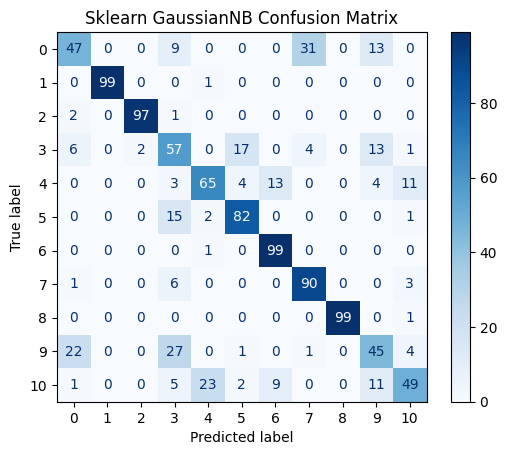

In [15]:
sk_cnf_mat = confusion_matrix(y_true=y_test, y_pred=sk_y_pred)

sk_cnf_disp = ConfusionMatrixDisplay(confusion_matrix=sk_cnf_mat)
sk_cnf_disp.plot(cmap="Blues", values_format="d")
plt.title("Sklearn GaussianNB Confusion Matrix")
plt.show()

In [16]:
sk_precision = precision_score(y_true=y_test, y_pred=sk_y_pred, average="macro")
sk_recall = recall_score(y_true=y_test, y_pred=sk_y_pred, average="macro")

print(f"Precision: {sk_precision}")
print(f"Recall: {sk_recall}")

Precision: 0.7521799376379014
Recall: 0.7536363636363638


In [17]:
sk_performance = {
    'accuracy': sk_accuracy,
    'confusion_matrix':sk_cnf_mat,
    'precision':sk_precision,
    'recall':sk_recall,
}

# Comparision

In [18]:
comp_df = pd.DataFrame(data={
    'my_implementation':impl_performance,
    'sklearn':sk_performance,
}).drop(index='confusion_matrix').round(4)
comp_df

,my_implementation,sklearn
accuracy,0.753636,0.753636
precision,0.75218,0.75218
recall,0.753636,0.753636


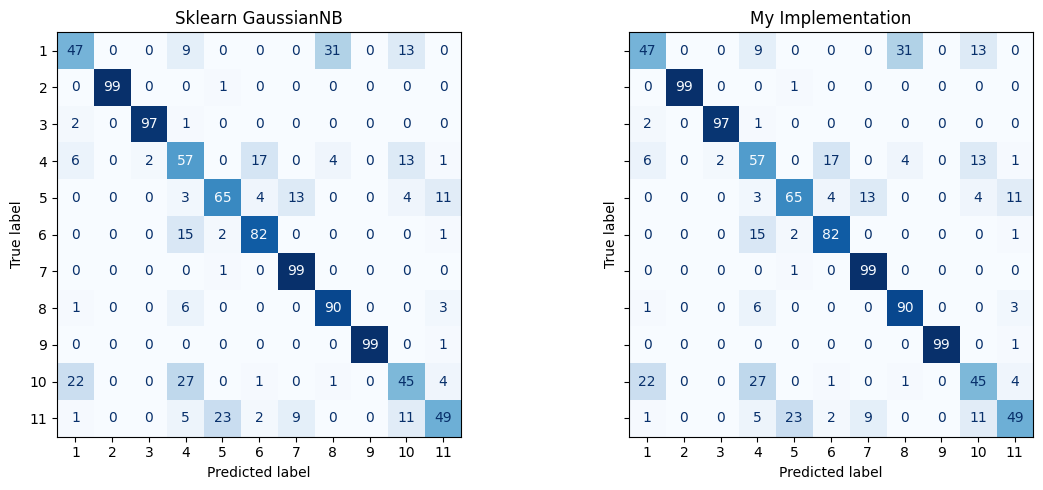

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ConfusionMatrixDisplay(sk_cnf_mat, display_labels=impl_model.classes).plot(
    ax=axes[0], cmap="Blues", values_format="d", colorbar=False
)
axes[0].set_title("Sklearn GaussianNB")

ConfusionMatrixDisplay(impl_cnf_mat, display_labels=impl_model.classes).plot(
    ax=axes[1], cmap="Blues", values_format="d", colorbar=False
)
axes[1].set_title("My Implementation")

plt.tight_layout()
plt.show()